In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#1.	Step 1: Load your CSV files into Pandas dataframes.
customers = pd.read_csv('customers-1.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

In [45]:
#2.	Step 2: Convert date columns to datetime format.
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
customers['registration_date'] = pd.to_datetime(customers['registration_date'])
products['launch_date'] = pd.to_datetime(products['launch_date'])

print(sales.dtypes)
print(customers.dtypes)
print(products.dtypes)

sale_id                      int64
customer_id                  int64
product_id                   int64
transaction_date    datetime64[ns]
quantity                     int64
total_amount               float64
dtype: object
customer_id                   int64
first_name                   object
last_name                    object
age                           int64
state                        object
income                        int64
registration_date    datetime64[ns]
email                        object
dtype: object
product_id               int64
product_name            object
category                object
price                  float64
launch_date     datetime64[ns]
brand                   object
dtype: object


In [46]:
#3. Step 3: Extract year, month, and weekday details from the transaction dates.
sales['year'] = sales['transaction_date'].dt.year
sales['month'] = sales['transaction_date'].dt.month
sales['weekday'] = sales['transaction_date'].dt.day_name()

print(sales[['transaction_date', 'year', 'month', 'weekday']].head())

     transaction_date  year  month   weekday
0 2022-02-10 14:30:00  2022      2  Thursday
1 2022-02-15 10:15:00  2022      2   Tuesday
2 2022-02-20 16:45:00  2022      2    Sunday
3 2022-02-25 11:20:00  2022      2    Friday
4 2022-03-01 13:10:00  2022      3   Tuesday


In [7]:
#4.	Step 4: Prepare your data for each chart in the dashboard.
sales_merged = pd.merge(sales, products, on='product_id', how='left')

revenue_by_category = sales_merged.groupby('category')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending=False)


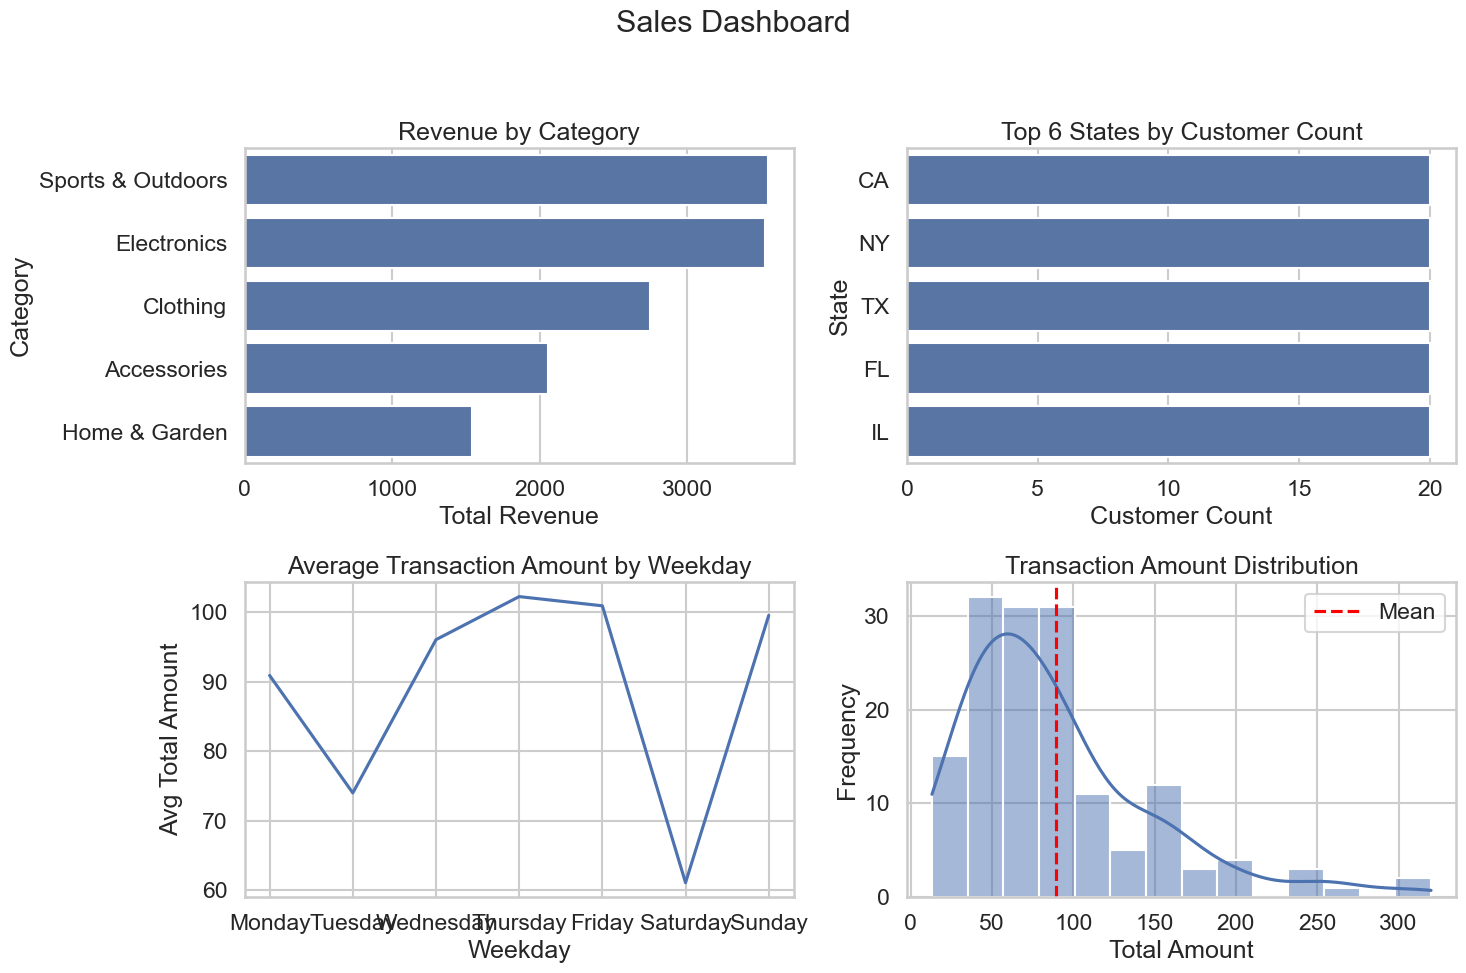

In [47]:
#5.	Step 5: Apply a professional seaborn and matplotlib style.
sns.set_theme(style='whitegrid', context='talk')
plt.rcParams.update({'figure.figsize': (16, 12)})

#6. Step 6: Build your 2x2 subplot layout with `plt.subplots()`.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Sales Dashboard", fontsize=22)

#7. Step 7: Plot each chart in the appropriate subplot

# Top Left: Horizontal bar chart of revenue by category 
sns.barplot(data=revenue_by_category, y='category', x='total_amount', ax=ax1)
ax1.set_title('Revenue by Category')
ax1.set_xlabel('Total Revenue')
ax1.set_ylabel('Category')

# Top Right: Top 6 states by customer count.
sns.barplot(data=top_states, x='customer_count', y='state', ax=ax2)
ax2.set_title('Top 6 States by Customer Count')
ax2.set_xlabel('Customer Count')
ax2.set_ylabel('State')

# Bottom Left: Line chart of average transaction by day.
sns.lineplot(data=avg_transaction_by_day, x='weekday', y='total_amount', ax=ax3)
ax3.set_title('Average Transaction Amount by Weekday')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('Avg Total Amount')

# Bottom Right: Histogram of transaction amounts with a vertical line for the mean.
sns.histplot(data=sales, x='total_amount', kde=True, ax=ax4)
ax4.axvline(sales['total_amount'].mean(), color='red', linestyle='--', label='Mean')
ax4.set_title('Transaction Amount Distribution')
ax4.set_xlabel('Total Amount')
ax4.set_ylabel('Frequency')
ax4.legend()

#8. Step 8: Polish layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [36]:
#9. Step 9: Analyze customer spending by grouping sales by `customer_id`.
customer_spending = sales.groupby('customer_id')['total_amount'].agg(['sum', 'count']).reset_index()


In [37]:
#10. Step 10: Merge customer spending with customer details and create age groups.
customer_data = pd.merge(customers, customer_spending, on='customer_id', how='left')
customer_data = customer_data.dropna(subset=['age'])

bins = [0, 30, 45, 60, 100]
labels = ['Under 30', '30-45', '45-60', '60+']
customer_data['age_group'] = pd.cut(customer_data['age'], bins=bins, labels=labels)

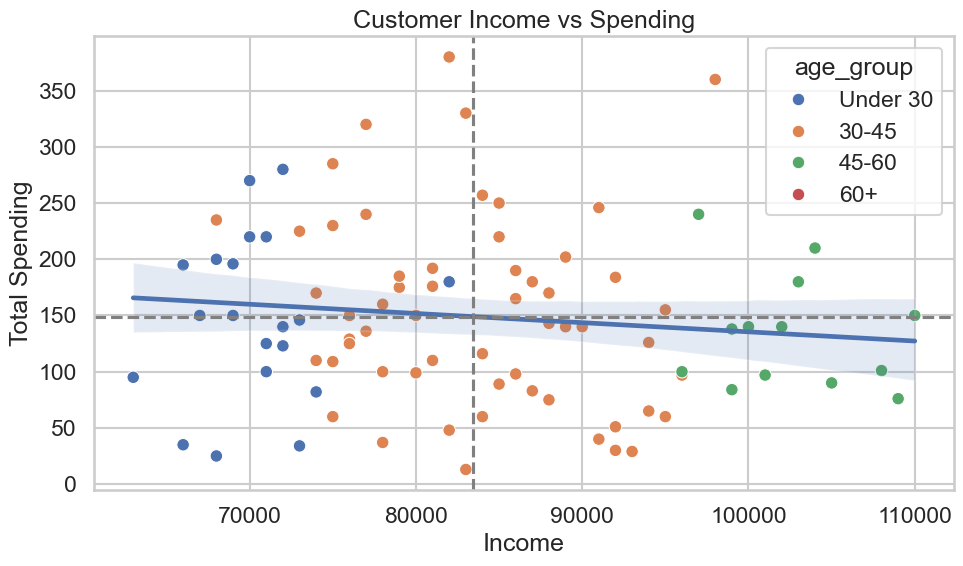

In [40]:
#11. Step 11: Create a layered visualization for customer income vs spending.
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='income', y='sum', hue='age_group', ax=ax)
sns.regplot(data=customer_data, x='income', y='sum', scatter=False, ax=ax)

#12	Step 12: Add a regression line, reference lines, and annotate your chart.
ax.axvline(customer_data['income'].mean(), color='gray', linestyle='--')
ax.axhline(customer_data['sum'].mean(), color='gray', linestyle='--')
ax.set_title('Customer Income vs Spending')
ax.set_xlabel('Income')
ax.set_ylabel('Total Spending')
plt.tight_layout()
plt.show()